**INDIAN INDEX PREDICTION USING LSTM,LINEAR REGRESSION,KNN**



* BATCH : B
* GROUP : 2



Group Members:

1.  Jaidev CB.EN.U4AIE21117
2.  Chandana CB.EN.U4AIE21118

3.   Charishma CB.EN.U4AIE21169
2.   Pranish CB.EN.U4AIE21137





In [ ]:
pip install yfinance


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 39.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 8.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

# **Long Short-Term Memory (LSTM)**


In [ ]:
#Importing all necessary libraries
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection  import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
#Acquiring stock data from yFinance
stock_data = yf.download('^NSEI', start='2020-01-01', end='2023-01-01')
stock_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01 00:00:00+05:30,12202.150391,12222.200195,12165.299805,12182.500000,12182.500000,304100
2020-01-02 00:00:00+05:30,12198.549805,12289.900391,12195.250000,12282.200195,12282.200195,407700
2020-01-03 00:00:00+05:30,12261.099609,12265.599609,12191.349609,12226.650391,12226.650391,428800
2020-01-06 00:00:00+05:30,12170.599609,12179.099609,11974.200195,11993.049805,11993.049805,396500
2020-01-07 00:00:00+05:30,12079.099609,12152.150391,12005.349609,12052.950195,12052.950195,447800


In [ ]:
stock_data.shape

(746, 6)

Text(0, 0.5, 'Prices')

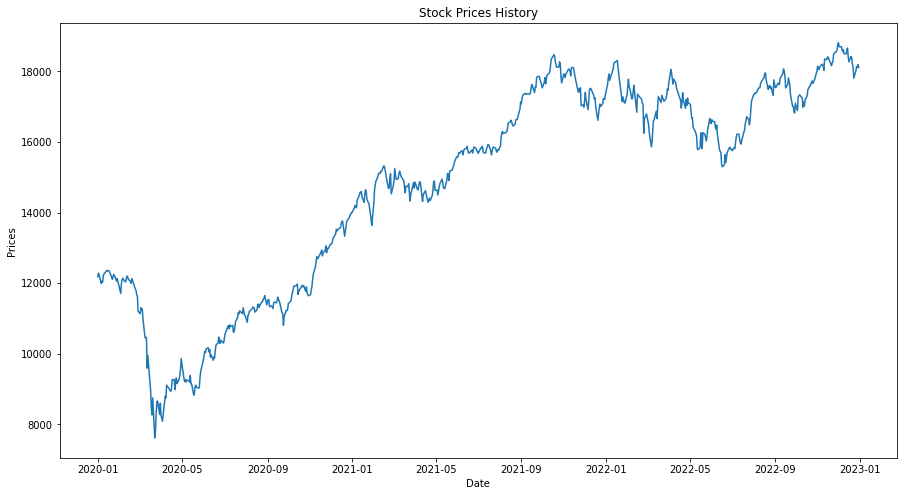

In [ ]:
plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
plt.plot(stock_data['Close'])
plt.xlabel('Date')
plt.ylabel('Prices')

In [ ]:
#Preparation of training set
close_prices = stock_data['Close']
values = close_prices.values
training_data_len = math.ceil(len(values)* 0.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
#Preparation of test set
test_data = scaled_data[training_data_len-60: , : ]
x_test = []
y_test = values[training_data_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 25)                2525      
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=3)

Epoch 1/3
537/537 [==============================] - 32s 53ms/step - loss: 0.0076
Epoch 2/3
537/537 [==============================] - 17s 31ms/step - loss: 0.0015
Epoch 3/3
537/537 [==============================] - 17s 31ms/step - loss: 0.0013


In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

5/5 [==============================] - 1s 27ms/step


381.82404178901004

<ipython-input-11-dd34e2280c92>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


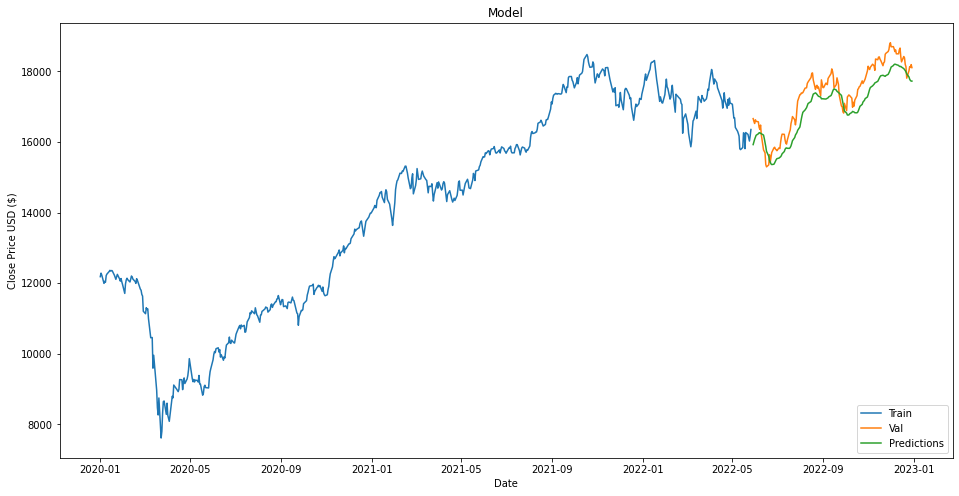

In [ ]:
data = stock_data.filter(['Close'])
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# **Linear** **Regression**

In [ ]:
stock_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,746.000000,746.000000,746.000000,746.000000,746.000000,7.460000e+02
mean,14808.918361,14892.066618,14697.324584,14798.596445,14798.596445,4.499288e+05
std,2896.161275,2891.285108,2900.832096,2898.403194,2898.403194,2.312172e+05
min,7735.149902,8036.950195,7511.100098,7610.250000,7610.250000,0.000000e+00
25%,12115.925293,12152.787842,12029.949707,12082.924805,12082.924805,2.664500e+05
50%,15736.949707,15791.575195,15653.975098,15725.050293,15725.050293,3.990000e+05
75%,17323.312988,17388.462891,17215.762207,17325.200684,17325.200684,6.070250e+05
max,18871.949219,18887.599609,18778.199219,18812.500000,18812.500000,1.811000e+06


In [ ]:
data = stock_data.filter(['Close'])
data.shape

(746, 1)

In [ ]:
x = stock_data[['High','Low','Open','Volume']].values

In [ ]:
y = stock_data['Close'].values

In [ ]:
# splitting x and y into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linreg=LinearRegression()

In [ ]:
linreg.fit(x_train,y_train)

LinearRegression()

In [ ]:
predicted = linreg.predict(x_test)
predicted

array([16704.39683543, 15825.01740978, 15983.837281  , 17005.97430925,
       16434.22084362, 15994.34837672, 17816.55630062, 12300.87962077,
       11932.48232895, 15777.25297185, 17736.36355043, 16884.8722504 ,
       17704.78539827, 16284.53823236, 10961.62836144, 15432.97055153,
       15845.02592533, 17115.38976718, 17468.59632868, 17342.10740841,
       18009.57717185, 14645.81809925, 12167.41784677, 18583.82880953,
       11740.90635234,  9072.71490161, 10542.96161467, 11945.54140786,
       14444.07597739,  9357.37700131, 17121.03626717, 16270.93168371,
       13343.72393392, 11520.69128792,  9078.02937278, 10438.85343421,
       16622.54697384, 17399.74532125, 17276.80483206, 12969.12697519,
       17143.81912114, 17444.90381035, 15204.64259276, 17880.00598756,
       13994.30805772, 14230.21672939, 12914.89099918, 14694.54362419,
       18101.86119038, 16346.25325425, 12910.74814776, 16585.76853509,
       17441.17922581, 17174.3626349 , 14810.52084926, 15818.45865321,
      

In [ ]:
stock_data = stock_data.reset_index()
x = np.array(stock_data.index).reshape(-1, 1)
y = stock_data['Close']

In [ ]:
linreg.fit(x, y)
print(linreg.score(x, y))
predictions = linreg.predict(x)

0.7986493308685425


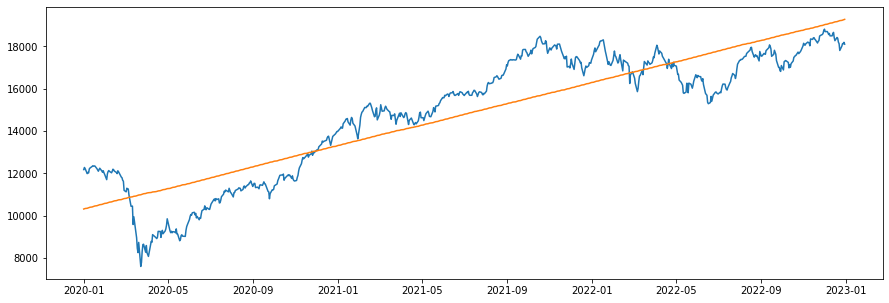

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(data['Close'])
plt.plot(data.index, predictions)

In [ ]:
print('R^2:', linreg.score(x, y))


R^2: 0.7986493308685425


# **KNN from Scratch**

In [ ]:
stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-01 00:00:00+05:30,12202.150391,12222.200195,12165.299805,12182.500000,12182.500000,304100
1,2020-01-02 00:00:00+05:30,12198.549805,12289.900391,12195.250000,12282.200195,12282.200195,407700
2,2020-01-03 00:00:00+05:30,12261.099609,12265.599609,12191.349609,12226.650391,12226.650391,428800
3,2020-01-06 00:00:00+05:30,12170.599609,12179.099609,11974.200195,11993.049805,11993.049805,396500
4,2020-01-07 00:00:00+05:30,12079.099609,12152.150391,12005.349609,12052.950195,12052.950195,447800


Text(0, 0.5, 'Prices')

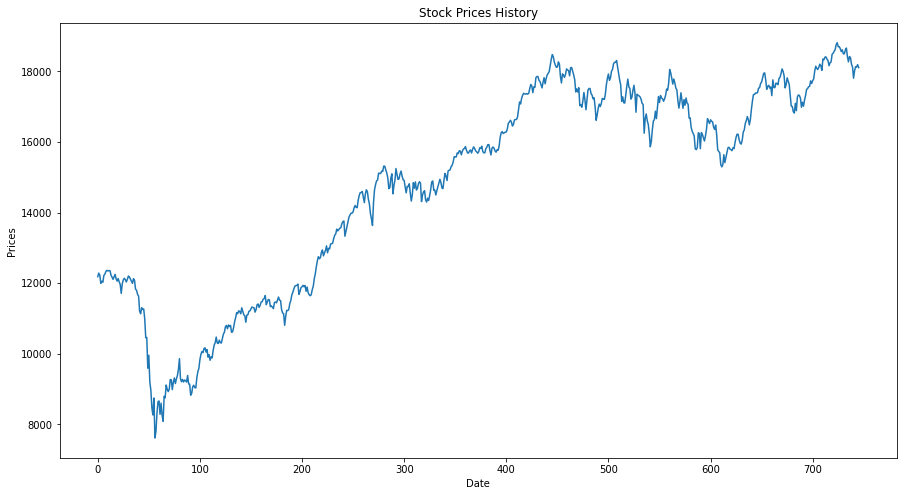

In [ ]:
plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
plt.plot(stock_data['Close'])
plt.xlabel('Date')
plt.ylabel('Prices')

In [ ]:
stock_data['Open-Close']= stock_data.Open -stock_data.Close
stock_data['High-Low']  = stock_data.High - stock_data.Low
stock_data =stock_data.dropna()
X= stock_data[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
0,19.650391,56.900391
1,-83.650391,94.650391
2,34.449219,74.250000
3,177.549805,204.899414
4,26.149414,146.800781


In [ ]:
Y= np.where(stock_data['Close'].shift(-1)>stock_data['Close'],1,-1)

In [ ]:
# Splitting the dataset
split_percentage = 0.7
split = int(split_percentage*len(stock_data))

X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

In [ ]:
import numpy as np
import pandas as pd
import statistics as stats

def distance (x,p):
        l=list(map(lambda x,y:(x-y)**2,x,p))
        return np.sqrt(sum(l))

class KNearestNeighbours :
    def __init__(self,n_neighbors=5):
        self.n_neighbors=n_neighbors
        self.feature_names=[]
        self.target_names=[]
        self.num_sampels=0
        self.x=0
        self.y=0
        self.predicted_values=0

    def fit(self,x,y):
        if isinstance(x,pd.DataFrame):
            self.feature_names = [f for f in x.columns]
            self.x=np.array(x)
        else:
            self.x=x
        if isinstance(y,pd.DataFrame):
            self.target_names = [f for f in y.columns]
            self.y=np.array(y).reshape(-1)
        else:
            self.y=y

        if np.isnan(self.x).any() or np.isnan(self.y).any():
            raise Exception("model does not accept NAN values")

        self.num_sampels=len(x)

    def predict(self, p):
        predict_values=[]
        p=np.array(p)
        for i in p:
            p = dict(sorted(self._predictions(i).items())[0:self.n_neighbors])
            predict_values.append(stats.mode(p.values()))
        self.predicted_values=predict_values
        return predict_values

    def _predictions(self,p):
        d=dict()
        for x,y in zip(self.x,self.y):
            dis=distance(x,p)
            d.update({dis:y})
        return d

In [ ]:
knnn=KNearestNeighbours()
knnn.fit(X_train, Y_train)

In [ ]:
accuracy_train = accuracy_score(Y_train, knnn.predict(X_train))
accuracy_test = accuracy_score(Y_test, knnn.predict(X_test))

print ('Train_data Accuracy: %.2f' %accuracy_train)
print ('Test_data Accuracy: %.2f' %accuracy_test)

from sklearn.metrics import classification_report

Train_data Accuracy: 0.69
Test_data Accuracy: 0.47


In [ ]:
print(classification_report(Y_test,knnn.predict(X_test)))

              precision    recall  f1-score   support

          -1       0.47      0.35      0.40       113
           1       0.47      0.59      0.52       111

    accuracy                           0.47       224
   macro avg       0.47      0.47      0.46       224
weighted avg       0.47      0.47      0.46       224



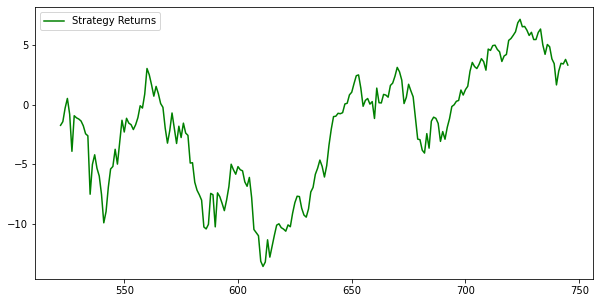

In [ ]:
# Predicted Signal
stock_data['Predicted_Signal'] = knnn.predict(x)

#Nifty Cumulative Returns
stock_data['Nifty_returns'] = np.log(stock_data['Close']/stock_data['Close'].shift(1))
Cumulative_SPY_returns = stock_data[split:]['Nifty_returns'].cumsum()*100

# Cumulative Strategy Returns
stock_data['Startegy_returns'] = stock_data['Nifty_returns']* stock_data['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = stock_data[split:]['Startegy_returns'].cumsum()*100

# Plot the results to visualize the performance

plt.figure(figsize=(10,5))
#plt.plot(Cumulative_SPY_returns, color='r',label = 'Nifty Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

# **Indian Stock Market before Covid 19 and after Covid 19**


In [ ]:
Beforecovid = yf.download('^NSEI', start='2016-01-01', end='2020-02-01')
Beforecovid.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04 00:00:00+05:30,7924.549805,7937.549805,7781.100098,7791.299805,7791.299805,134700
2016-01-05 00:00:00+05:30,7828.399902,7831.200195,7763.250000,7784.649902,7784.649902,145200
2016-01-06 00:00:00+05:30,7788.049805,7800.950195,7721.200195,7741.000000,7741.000000,147100
2016-01-07 00:00:00+05:30,7673.350098,7674.950195,7556.600098,7568.299805,7568.299805,188900
2016-01-08 00:00:00+05:30,7611.649902,7634.100098,7581.049805,7601.350098,7601.350098,157400


In [ ]:
Duringcovid = yf.download('^NSEI', start='2020-02-01', end='2020-08-01')
Duringcovid.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-02-03 00:00:00+05:30,11627.450195,11749.849609,11614.500000,11707.900391,11707.900391,669800
2020-02-04 00:00:00+05:30,11786.250000,11986.150391,11783.400391,11979.650391,11979.650391,560400
2020-02-05 00:00:00+05:30,12005.849609,12098.150391,11953.349609,12089.150391,12089.150391,758000
2020-02-06 00:00:00+05:30,12120.000000,12160.599609,12084.650391,12137.950195,12137.950195,565100
2020-02-07 00:00:00+05:30,12151.150391,12154.700195,12073.950195,12098.349609,12098.349609,473500


In [ ]:
Aftercovid = yf.download('^NSEI', start='2020-08-01', end='2021-08-01')
Aftercovid.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-08-03 00:00:00+05:30,11057.549805,11058.049805,10882.250000,10891.599609,10891.599609,680900
2020-08-04 00:00:00+05:30,10946.650391,11112.250000,10908.099609,11095.250000,11095.250000,625700
2020-08-05 00:00:00+05:30,11155.750000,11225.650391,11064.049805,11101.650391,11101.650391,667600
2020-08-06 00:00:00+05:30,11185.700195,11256.799805,11127.299805,11200.150391,11200.150391,600400
2020-08-07 00:00:00+05:30,11186.650391,11231.900391,11142.049805,11214.049805,11214.049805,452600


Text(0, 0.5, 'Prices')

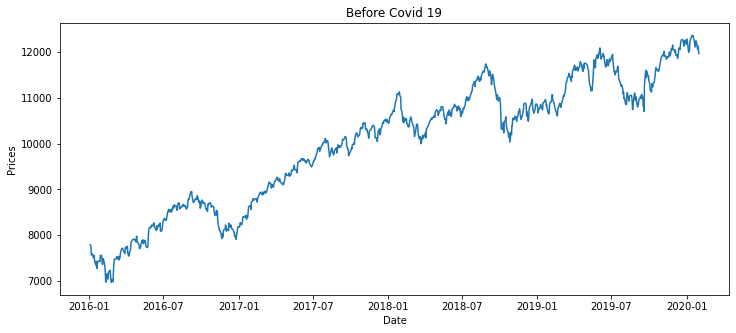

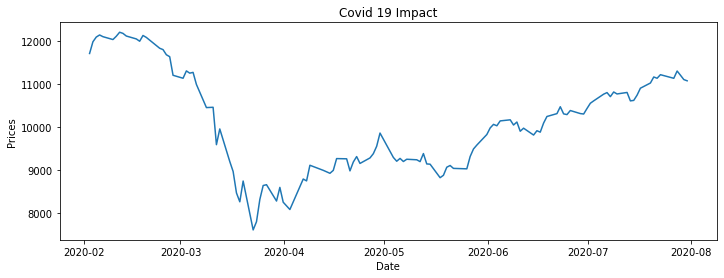

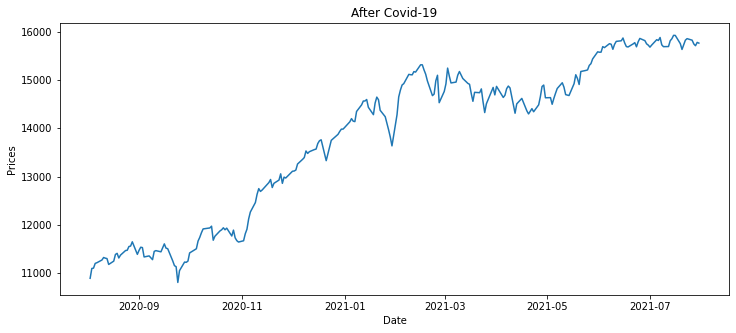

In [ ]:
plt.figure(figsize=(12, 5))
plt.title('Before Covid 19')
plt.plot(Beforecovid['Close'])
plt.xlabel('Date')
plt.ylabel('Prices')

plt.figure(figsize=(11.78, 4))
plt.title('Covid 19 Impact')
plt.plot(Duringcovid['Close'])
plt.xlabel('Date')
plt.ylabel('Prices')

plt.figure(figsize=(12,5))
plt.title('After Covid-19')
plt.plot(Aftercovid['Close'])
plt.xlabel('Date')
plt.ylabel('Prices')

